<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Gmail - Clean mailbox
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Gmail/Gmail_Clean_mailbox.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

<img width="20%" alt="Naas" src="https://cdn.vox-cdn.com/thumbor/K-q2WRPRyxxzzPLjxHGt26swMfM=/0x0:1320x880/1200x800/filters:focal(555x335:765x545)/cdn.vox-cdn.com/uploads/chorus_image/image/67587450/newgmaillogo.0.jpg"/>

## Account credentials

In [1]:
username = "**********@gmail.com"
password = "**********"
smtp_server = "imap.gmail.com"
box = "INBOX"

Note: You need to create an application password following this procedure - https://support.google.com/mail/answer/185833?hl=en

## Connect to email box

In [2]:
import naas_drivers
emails = naas_drivers.email.connect(username, 
        password, 
        username, 
        smtp_server)

## Get email list

In [3]:
dataframe = emails.get(criteria="ALL")
dataframe

,uid,subject,from,to,cc,bcc,reply_to,date,text,html,flags,headers,size_rfc822,size,obj,attachments
0,32,Test,"{'email': 'ajaysabu007@gmail.com', 'name': 'Or...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-24 15:15:12+05:30,Test mail\r\n,"<div dir=""auto"">Test mail</div>\r\n",(),{'Content-Type': ('multipart/alternative; boun...,4718,4648,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
1,31,Test mail,"{'email': 'dorissabu111@gmail.com', 'name': 'D...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-24 15:14:42+05:30,Test mail received\r\n,"<div dir=""auto"">Test mail received</div>\r\n",(),{'Content-Type': ('multipart/alternative; boun...,4755,4685,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
2,30,Test mail,"{'email': 'sanjay.s@bridge-global.com', 'name'...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-24 15:12:05+05:30,"This is a test mail\r\n-- \r\nBest Regards,\r\...","<div dir=""ltr""><br clear=""all""><div>This is a ...",(),{'Content-Type': ('multipart/alternative; boun...,7070,6969,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
3,29,Test mail,"{'email': 'sanjaysabu4205@gmail.com', 'name': ...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-24 15:11:49+05:30,This is a test mail\r\n,"<div dir=""ltr"">This is a test mail</div>\r\n",(),{'Content-Type': ('multipart/alternative; boun...,4779,4709,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
4,22,Another test mail,"{'email': 'sanjaysabu4205@gmail.com', 'name': ...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-17 11:54:36+05:30,This is another test mail\r\n,"<div dir=""ltr"">This is another test mail</div>...","(SEEN,)",{'Content-Type': ('multipart/alternative; boun...,4795,4725,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
5,16,Please send sales report?,"{'email': 'jeremy.ravenel@cashstory.com', 'nam...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-15 10:56:37+01:00,Could you please send sales report man?\r\n\r\...,"<div dir=""ltr""><div class=""gmail_default"" styl...","(SEEN,)",{'Content-Type': ('multipart/alternative; boun...,6050,5962,"[Delivered-To, Received, X-Received, ARC-Seal,...",0


## Creating dataframe and inserting values

In [4]:
sender_name = []
sender_email = []
for df in dataframe["from"]:
    sender_name.append(df['name'])
    sender_email.append(df['email'])
import pandas as pd
result = pd.DataFrame(columns = ['SENDER_NAME','SENDER_EMAIL','COUNT','PERCENTAGE'])
import numpy as np
indexes = np.unique(sender_name, return_index=True)[1]
[sender_name[index] for index in sorted(indexes)]

indexes = np.unique(sender_email, return_index=True)[1]
[sender_email[index] for index in sorted(indexes)]
total_email = len(emails.get(criteria="ALL"))
c = 0
for i in sender_email:
    new_row = {'SENDER_NAME':sender_name[c],'SENDER_EMAIL':i,'COUNT':sender_email.count(i),'PERCENTAGE':round(((sender_email.count(i))/total_email)*100)}
    result = result.append(new_row, ignore_index=True)
    c+=1
result = result.drop_duplicates()
result.sort_values(by=['COUNT'], inplace=True, ascending=False)
result

,SENDER_NAME,SENDER_EMAIL,COUNT,PERCENTAGE
3,Sanjay Sabu,sanjaysabu4205@gmail.com,2,33
0,Orb,ajaysabu007@gmail.com,1,17
1,Doris Sabu,dorissabu111@gmail.com,1,17
2,Sanjay Sabu,sanjay.s@bridge-global.com,1,17
5,Jeremy Ravenel,jeremy.ravenel@cashstory.com,1,17


## Email graph plot

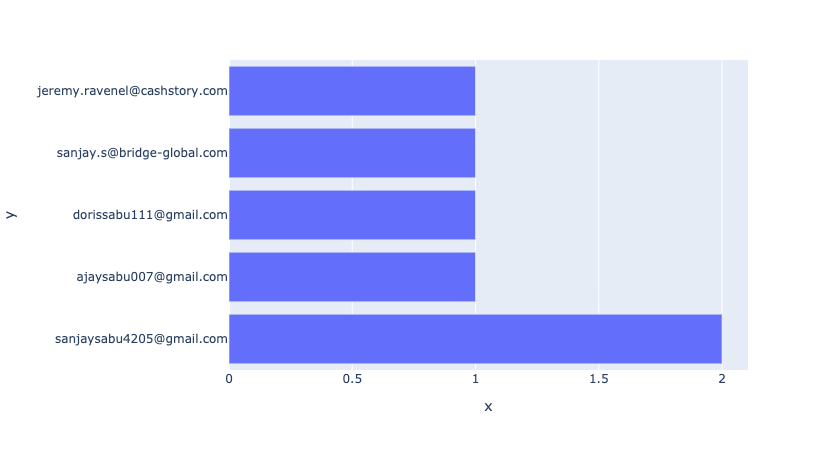

In [13]:
import plotly.express as px
fig = px.bar(x=result['COUNT'], y=result['SENDER_EMAIL'], orientation='h')
fig.show()

## Deleting using uid

In [6]:
%%time
uid = [21]   #uid of mails to be deleted
uid = map(str, uid)  
flag = "DELETED"
for i in uid:
    attachments = emails.set_flag(i, flag, True)

CPU times: user 5.55 ms, sys: 0 ns, total: 5.55 ms
Wall time: 434 ms


## Deleting using email id

In [7]:
d_email = "notifications@naas.ai"  # email id to be deleted
data_from = dataframe['from']
data_uid = dataframe['uid']
uid = []
for i in range(len(dataframe)):
    if data_from[i]['email'] == d_email:
        uid.append(data_uid[i])

## Deleting the emails

In [9]:
for i in uid:
    attachments = emails.set_flag(i, "DELETED", True)

## Showing the upated email list

In [10]:
dataframe = emails.get(criteria="ALL")
dataframe

,uid,subject,from,to,cc,bcc,reply_to,date,text,html,flags,headers,size_rfc822,size,obj,attachments
0,32,Test,"{'email': 'ajaysabu007@gmail.com', 'name': 'Or...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-24 15:15:12+05:30,Test mail\r\n,"<div dir=""auto"">Test mail</div>\r\n",(),{'Content-Type': ('multipart/alternative; boun...,4718,4648,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
1,31,Test mail,"{'email': 'dorissabu111@gmail.com', 'name': 'D...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-24 15:14:42+05:30,Test mail received\r\n,"<div dir=""auto"">Test mail received</div>\r\n",(),{'Content-Type': ('multipart/alternative; boun...,4755,4685,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
2,30,Test mail,"{'email': 'sanjay.s@bridge-global.com', 'name'...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-24 15:12:05+05:30,"This is a test mail\r\n-- \r\nBest Regards,\r\...","<div dir=""ltr""><br clear=""all""><div>This is a ...",(),{'Content-Type': ('multipart/alternative; boun...,7070,6969,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
3,29,Test mail,"{'email': 'sanjaysabu4205@gmail.com', 'name': ...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-24 15:11:49+05:30,This is a test mail\r\n,"<div dir=""ltr"">This is a test mail</div>\r\n",(),{'Content-Type': ('multipart/alternative; boun...,4779,4709,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
4,22,Another test mail,"{'email': 'sanjaysabu4205@gmail.com', 'name': ...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-17 11:54:36+05:30,This is another test mail\r\n,"<div dir=""ltr"">This is another test mail</div>...","(SEEN,)",{'Content-Type': ('multipart/alternative; boun...,4795,4725,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
5,16,Please send sales report?,"{'email': 'jeremy.ravenel@cashstory.com', 'nam...","[{'email': 'naas.sanjay22@gmail.com', 'name': ...",[],[],[],2020-12-15 10:56:37+01:00,Could you please send sales report man?\r\n\r\...,"<div dir=""ltr""><div class=""gmail_default"" styl...","(SEEN,)",{'Content-Type': ('multipart/alternative; boun...,6050,5962,"[Delivered-To, Received, X-Received, ARC-Seal,...",0
